# Problem 1: One - Dimensional

In [1]:
# important information
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
from numpy import linalg as la
import math

### Problem 1A) 1-dimensional CA Rule
Consider the following rules for a 1-dimentional CA, which uses a neighborhood radius of 1 (i.e. each cell considers itself and the immediate neighbors to either side):

- If all three cells in the neighborhood are 1’s, the center cell becomes a 0
- If 2 of the 3 cells in the neighborhood are 1’s, become a 1
- If precisely one of the neighbor cells are 1’s, and the center cell is a zero, become a 1
- If only the center cell is a 1, become a 0
- If all cells are 0’s, stay a 0

In [2]:
# CREATING THE RULE:
rule = {
        (1,1,1):0,
        (1,1,0):1,
        (1,0,1):1,
        (1,0,0):1,
        (0,1,1):1,
        (0,1,0):0,
        (0,0,1):1,
        (0,0,0):0
        }

**Which rule is this?** Determine the binary number rule associated with this rule set. :

- The above rule represents rule 122 [01111010].

### Problem 1B) Implement the model
Implement the model in python with an 8-cell 1-dimensional grid, with wrapped boundaries (i.e. a ring). Explore the network phase space for this rule, and highlight the attracting subcomponents.

- How many distinct basins of attraction are there?
- What behaviors does each basin of attraction exhibit? E.g. do all the initial conditions lead to a constant steady state, or does the system approach an oscillation? If it does oscillate, how long is the period of the oscillation?
In your write-up, be sure to include plots of each network component (i.e. basin of attraction), with the attracting sub-component highlighted in another color, as well as a description of the model dynamics for each component.

**Configuration function**

In [3]:
# how do I determine the initial conditions?
# config2int
def config2int(config):
    return int(''.join(map(str, config)),2)
# int2config
def int2config(x):
     # does it have something to do with counting backwards
     # REVIEW THESE BIT CONVERSIONS
     return [1 if x & 2**i > 0 else 0 for i in range(L - 1, -1, -1)]

**Function for updating the CA**

In [4]:
# update
def update(config):
    nextconfig = [0]*L
    for x in range(L):
        nextconfig[x] = rule[(config[(x-1) % L], config[x],config[(x + 1) % L])]
    return nextconfig

**Set up the initial conditions**

In [5]:
# length of the cells
L = 8
steps = 20
first = 1 # I think that this is some arbitrary start condition

# make a full matrix of zeros
output = np.zeros([steps,L]) #make a full matrix

**Run the model:** 

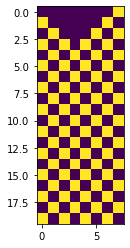

In [6]:
output[0,:] = int2config(first)
for i in range(1,steps):
    output[i,:] = update(output[i-1,:])
plt.cla()
plt.imshow(output)
plt.show()

**Explore the phase space:** Run the cellular automata model for every possible starting configuration and add an edge linking each initial condition to where it goes next. There are $2^L$ total possible initial conditions.

In [7]:
g = nx.DiGraph() # Make an empty graph that will be the phase space

for x in range(2**L):
    g.add_edge(x, config2int(update(int2config(x))))

Loops in basin 0 : [[0]]


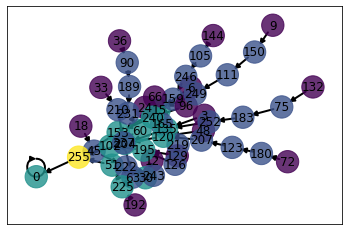

Loops in basin 1 : [[170, 85]]


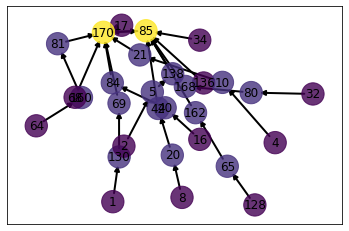

Loops in basin 2 : [[7, 141, 223, 112, 216, 253]]


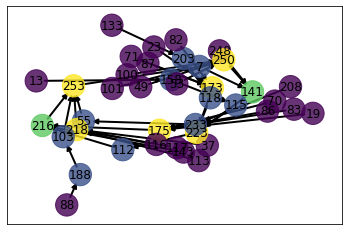

Loops in basin 3 : [[224, 177, 251, 14, 27, 191]]


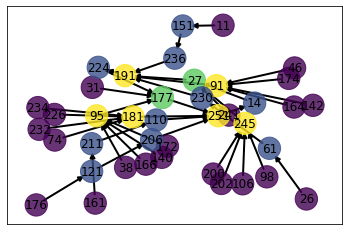

Loops in basin 4 : [[193, 99, 247, 28, 54, 127]]


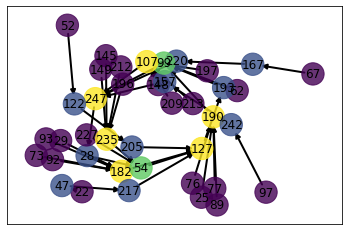

Loops in basin 5 : [[131, 198, 239, 56, 108, 254]]


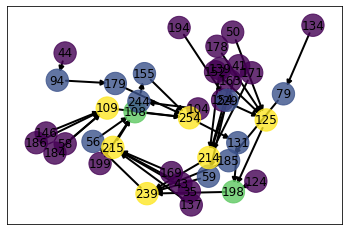

Loops in basin 6 : [[221, 119]]


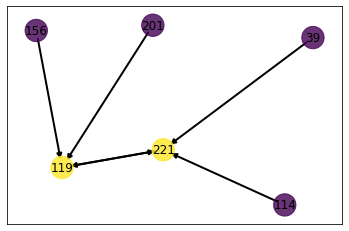

Loops in basin 7 : [[187, 238]]


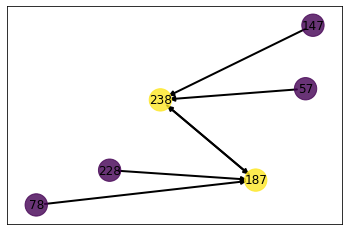

In [8]:
# re analyzing the phase space
ccs = [cc for cc in nx.connected_components(g.to_undirected())]
n = len(ccs)
w = math.ceil(math.sqrt(n))
h = math.ceil(n / w)
for i,cc in enumerate(ccs):
    plt.clf()
    
    subg = nx.subgraph(g, cc)
    attr = set().union(*nx.attracting_components(subg))
    
    pos=nx.spring_layout(subg) # positions for all nodes
    nx.draw_networkx_nodes(subg, pos, node_color=list(nx.degree_centrality(subg).values()), node_size=500, alpha=0.8)
    nx.draw_networkx_edges(subg,pos,width=2.0)
    nx.draw_networkx_labels(subg,pos)
    
    print("Loops in basin {} : {}".format(i, list(nx.simple_cycles(nx.subgraph(g,cc)))))
    plt.show()

**How many distinct basins of attraction are there?** There are 7 unique basins of attraction

**What behaviors does each basin of attraction exhibit? E.g. do all the initial conditions lead to a constant steady state, or does the system approach an oscillation? If it does oscillate, how long is the period of the oscillation?** See the plots of each basin of attraction above. If an oscillation exists, the loop is labelled with the component cycling states. 0 represents one stable states. 255 is another stable state illustrated in the first plot.The rest have loops of different lengths ranging from 2 to 6.

### Problem 1C) Choose a configuration
Choose one of the configurations from the phase space to be the model initial condition, and plot the CA state over 20 timesteps. Be sure to note which initial configuration you chose.

**Start with initial condition 132

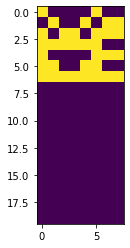

In [9]:
initial_cond = 132

output = np.zeros([steps,L]) #make a full matrix
output[0,:] = int2config(initial_cond)
for i in range(1,steps):
    output[i,:] = update(output[i-1,:])
plt.cla()
plt.imshow(output)
plt.show()

### Problem 1D) Choose one of the larger components/basins of attraction. 
Try out one of the centrality measures from the python NetworkX package (e.g. closeness or betweenness centrality are often nice examples). Plot the component and adjust the node colors based on the centrality score of each node. You can do this by setting node_color=list(nx.closeness_centrality(subg).values()) when you call nx.draw_networkx_nodes(). Which types of nodes appear to be highlighted by the centrality type you chose?

{133: Text(-0.0081167876917317, 0.725445282297022, '133'),
 7: Text(0.639965043041475, -0.06875362003553845, '7'),
 13: Text(0.19513238239952893, 1.0, '13'),
 141: Text(0.45971251162029336, -0.45539555601648785, '141'),
 143: Text(-0.6915490544859201, -0.38759650998642287, '143'),
 19: Text(-0.4413634191099839, -0.8604014550389097, '19'),
 23: Text(0.5334021283092277, 0.2702488821742162, '23'),
 158: Text(0.6553158239687454, 0.4608055882146471, '158'),
 37: Text(-0.449498563785967, -0.2618864678535626, '37'),
 173: Text(0.4992564829451658, -0.31151774723277453, '173'),
 175: Text(-0.6345630073249825, -0.2920620447651076, '175'),
 49: Text(0.27417961532233964, 0.5697834421020228, '49'),
 53: Text(0.40610268888784923, 0.43758804196040046, '53'),
 55: Text(-0.33656278656911764, 0.3805236760100627, '55'),
 188: Text(-0.805284586878664, -0.09651569085829853, '188'),
 70: Text(-0.6481148944916509, -0.8376472776104297, '70'),
 71: Text(0.8287296774130832, 0.2821750082579123, '71'),
 203: Text

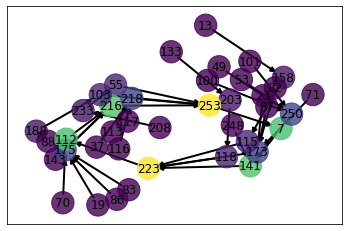

In [10]:
# closeness, betweeness, centrality
# adjust node colors based on the centrality score of each node
# node_color=list(nx.closeness_centrality(subg).values()) when you call nx.draw_networkx_nodes()
subg = nx.subgraph(g, ccs[2])
attr = set().union(*nx.attracting_components(subg))

pos=nx.spring_layout(subg) # positions for all nodes

nx.draw_networkx_nodes(subg, pos, 
                       node_color=list(nx.betweenness_centrality(subg).values()),
                       node_size=500, 
                       alpha=0.8)
nx.draw_networkx_edges(subg,pos,width=2.0)
nx.draw_networkx_labels(subg,pos)

*(I'm not sure what all of the above output is for)*

**Which types of nodes appear to be highlighted by the centrality type you chose?**
I chose to analyze betweenness centrality. The main nodes are 223 and 253. Both of these nodes are important components of the oscillation with many connections to the rest of the network. Other influential nodes include 112, 141, and 216, all of whic hare also components of the central oscillation, but probably have fewer connections to the rest of the network. 
Betweenness centrality is a measure of network centrality based on the shortest paths. It represents "the degree to which nodes stand between each other." In other words, higher betweenness centrality indicates that a node exerts more control over the network because more paths cross through the node.

# Problem 2: 2-Dimensional CA - Langton's Ant


### Implement Langton's ant
- Create a class to represent the ant
- Create a class to represent the simulation

In [11]:
# import the few packages that aren't here yet
from numpy import linalg as la
import math
import pycxsimulator as pycx
from pylab import *

In [12]:
class langton:
    antmarker = {0:'^', 1:'>', 2:'v', 3:'<'}
    
    def __init__(self, size = 11, length = 100, play = False, pos = None):
        self.size = size
        self.length = length
        self.config = np.zeros([size, size])
        self.play = play
        
        if pos == None: 
            center = int(size)/2
            center = int(center)
            self.ant = [center, center,0]
        else: 
            self.ant = [pos[0], pos[1], 0]
        
        
    def run(self, play = False):
        self.play = play
        
        if self.play == False:
            self.output()
        
    def next(self):
        #checks the current color
        color = self.config[self.ant[0],self.ant[1]]
        
        if color > 0:
            # black
            self.ant[2] = (self.ant[2] + 1) % 4
            #changes the cell to white
            self.config[self.ant[0],self.ant[1]] = 0
            # moves forward
            self.move()
        else :
            # black
            self.ant[2] = (self.ant[2] - 1) % 4
            #changes the cell to block
            self.config[self.ant[0],self.ant[1]] = 1
            # moves forward
            self.move()  
    
    def output(self):
        for x in range(self.length):
            self.next()
        
        # show the end result
        plt.imshow(self.config, cmap = cm.binary)
        plt.show()
    
    def initial(self):
        #just show the initial state
        plt.imshow(self.config, cmap = cm.binary)
        plt.show()
        
    def move(self):
        # take a look at the ant object
        # move it one space forward in accordance with its direction
        # what do I want to do about boundaries
        
        # if it is even move up or down
        # if it is odd move left or right
        # lets have it loop around (so basically modulus i think? )
        if self.ant[2]%2 == 0:
            self.ant[0] = ((1 - self.ant[2]) + self.ant[0])%self.size
        else:
            self.ant[1] = ((2 - self.ant[2]) + self.ant[1])%self.size
        # loop it back aro
    
    def mod_center(self, center_matrix):
        center = int(self.size)/2
        center = int(center)
        
        cell = [center - 1, center - 1]
        
        for row in range(3):
            for col in range(3):
                self.config[cell[0]+row][cell[1] + col] = center_matrix[row][col]

In [13]:
class langtonant:
    def __init__(self, size, time):
        ant1 = langton(size = size, length = time)
        ant1.run()

### Problem 2A) Write your own implementation of Langton’s Ant in Python.
Use PyCX.
Use a grid size of at least 11×11, as this will contain the ant for 200 steps (you may choose if you want a wrapped or non-wrapped boundary)

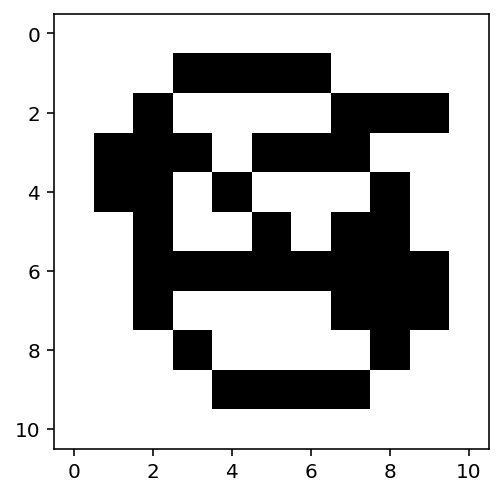

In [14]:
langtonant(11,200)

### Problem 2B) How many possible initial states/configurations are there for an 11×11 grid of Langton’s Ant (assuming a single ant)? 
You can work this out by figuring out how many possible configurations of black and white cells there are, and how many possible ways there are to place and orient the ant. How plausible is it to characterize the phase space network for such a system?

In [15]:
# how many possible configurations of black and white cells?
cells = 11 * 11
grid_states = 2**cells
# although some might be considered functionally equivalent
print("Grid States: {}".format(grid_states))

# in each of those states, the ant can be in any position, therefore, 
phase_space = cells * grid_states * 4
print("Phase Space: {}".format(phase_space))

Grid States: 2658455991569831745807614120560689152
Phase Space: 1286692699919798564970885234351373549568


The above number represents the total number of potential starting states in an $11 X 11$ grid (neglecting the nant. Basically, there are a lot! Some may be functionally equivalent (mirror images).

If you add the ant, then every grid state can have the ant starting at any of the cells ($11*11$) and pointing in any direction ($4$). The total phase space is listed above.

It is not plausible to characterize the phase space for this kind of system. There are impossibly many starting conditions. The only reasonable approach would be to randomly sample from the phase space to observe how much starting condition influences the ultimate behaviour.

### Problem 2C) Expanded Langton's Ant
Next, expand your grid size (to at least 50×50) and set the center 3x3 cells to an arbitrary configuration of black and white cells (you can choose one or assign it randomly). Simulate Langton’s ant using these conditions with a longer duration of your choice. What happens to the ant dynamics as time goes on? (Note that if you choose a very large grid and/or long time, it may take a few minutes to run this simulation.)

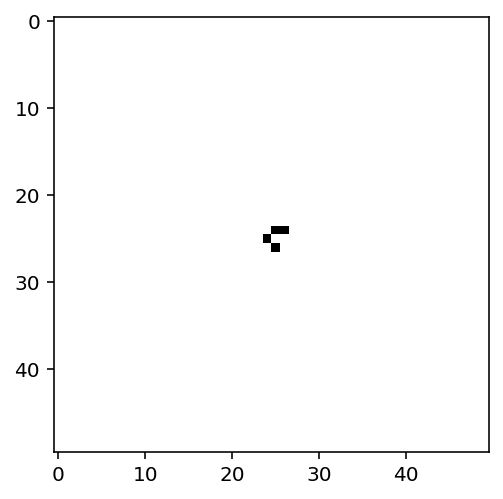

In [16]:
# create an arbitrary starting matrix
center_matrix = [
    [0,1,1],
    [1,0,0],
    [0,1,0]
    ]

langton2c = langton(size = 50, length = 10000)
langton2c.mod_center(center_matrix)

langton2c.initial()

Run the simulation for 10000 timesteps

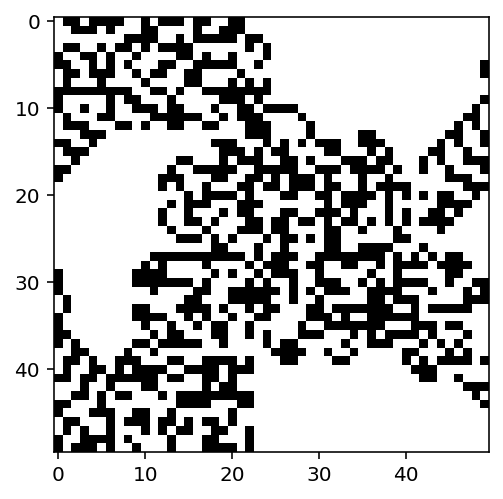

In [17]:
langton2c.run()

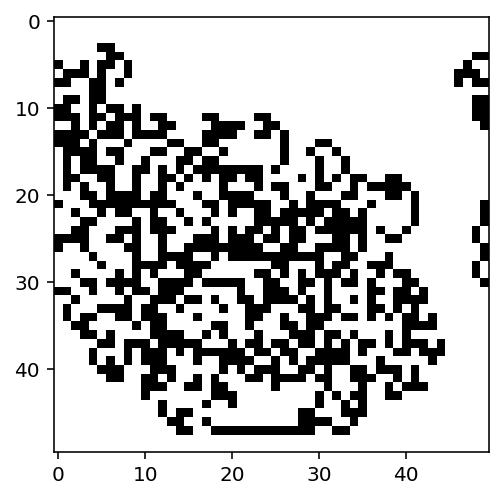

In [18]:
# find something to compare it too.
langtonant(50,10000)

The first image above shows the initial state. The following represent the ant after 10,000 iterations and the arbitrary 3x3 matrix initial condition. The second figure represents Langton's Ant with normal rules after 10,000 iterations. Despite only a slight deviation in initial conditions (5 changes to cell states), the ultimate pattern has diverged substantially. The patterns are completely distinct. As time goes on (in the active simulation), the pattern drawn by the ant continues to diverge.

# Problem 3: Exploring Network Data


load the requisite packages

In [19]:
# set up
from math import *
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

Import all of the good stuff

In [20]:
g = nx.read_gml('polbooks.gml')

### Make the network from the Political Books

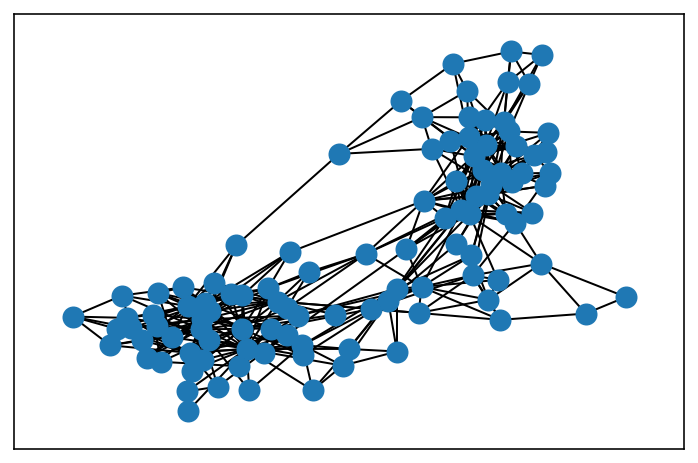

In [21]:
#show the network
pos=nx.spring_layout(g) # positions for all nodes
nx.draw_networkx(g, pos, with_labels = False, node_size = 100) # draw network
plt.show()

### **Problem 3A)** Degree distribution. 
Plot the degree distribution for this network. You can collect the degree sequence for the network with deg_seq = [d for n, d in g.degree()]. Try this first by plotting the degree distribution on a linear scale, then try it on a log-log scale. Does this degree distribution look scale-free to you? (Would you expect it to?)

(array([21., 33., 17., 12.,  5.,  3.,  6.,  1.,  3.,  4.]),
 array([ 2. ,  4.3,  6.6,  8.9, 11.2, 13.5, 15.8, 18.1, 20.4, 22.7, 25. ]),
 <BarContainer object of 10 artists>)

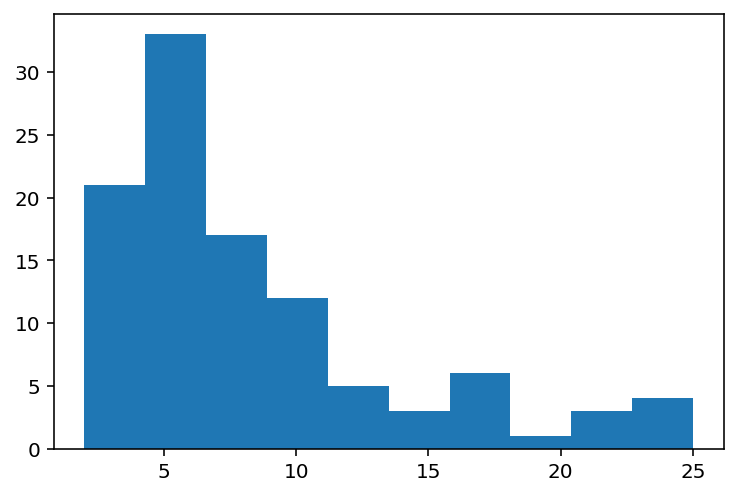

In [22]:
# get the degree sequence
deg_seq = [d for n, d in g.degree()]
plt.hist(deg_seq)

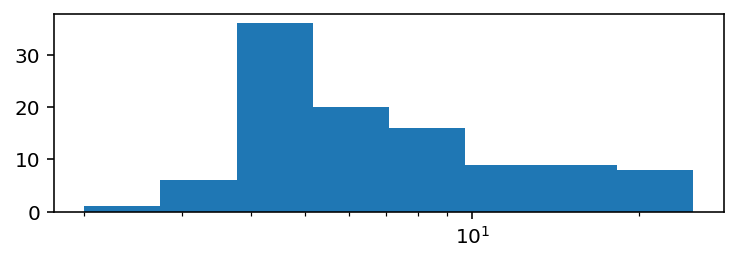

In [23]:
# histogram on log scale. 
# Use non-equal bin sizes, such that they look equal on log scale.
# Plotting format found online
hist, bins, _ = plt.hist(deg_seq, bins=8)
logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
plt.subplot(212)
plt.hist(deg_seq, bins=logbins)
plt.xscale('log')
plt.show()

**Does the degree distribution look scale free to you?:**
A scale-free network is a network whose degree distribution follows a power law. The above histograms appear to indicate that the network follows a power law and is not normally distributed or distributed according to other distributions.


### **Problem 3B) Centrality.** 
Re-draw the network diagram, but this time highlight the nodes (i.e. adjust their color) based on one of the types of centrality available in NetworkX. Which nodes are most central using this type of centrality? What features does this centrality appear to be capturing?

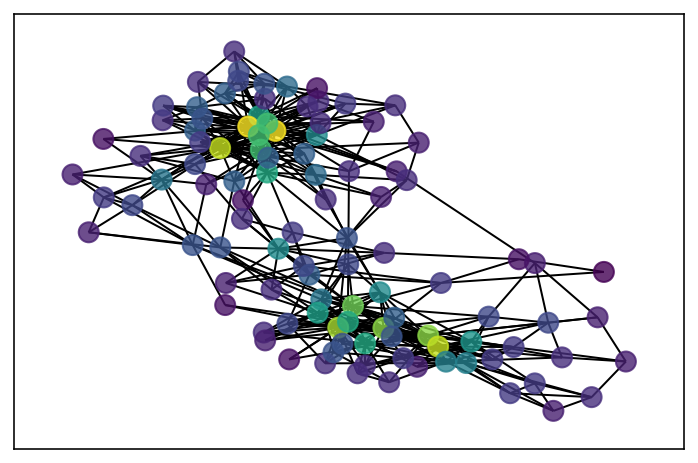

In [24]:
# Redrawing the network
# g is the network
# highlight network centrality
pos = nx.spring_layout(g)
nx.draw_networkx_nodes(g, 
                       pos, 
                       node_color = list(nx.degree_centrality(g).values()),
                       node_size = 100,
                       alpha = 0.8
                      )
nx.draw_networkx_edges(g, pos, width=1.0)

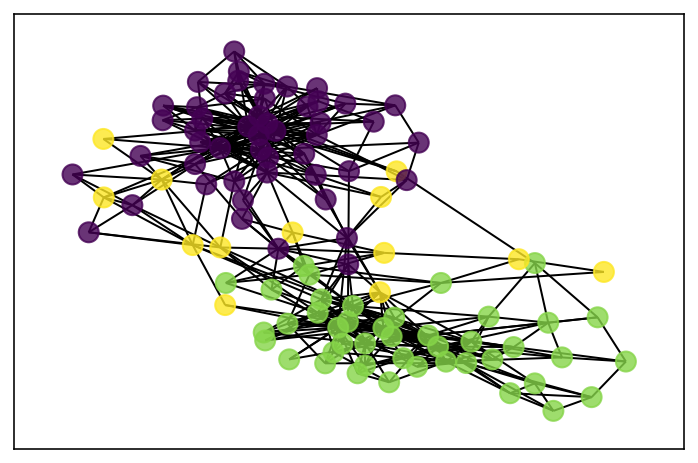

In [25]:
politics = dict(g.nodes(data = "value", default = 1)).values()
values = []
for val in politics:
    values.append(ord(val) - 96)
    
nx.draw_networkx_nodes(g, 
                       pos, 
                       node_color = list(values),
                       node_size = 100,
                       alpha = 0.8
                      )
nx.draw_networkx_edges(g, pos, width=1.0)

**ANSWER QUESTION: based on one of the types of centrality available in NetworkX. Which nodes are most central using this type of centrality? What features does this centrality appear to be capturing?**

The first plot is colored based on connectance. The second is organized based on political affiliation.

I plotted the above network using degree centrality. The most central nodes in the network at found at the core of each political group. Most books are liberal or conservative, but relatively less connected. A few "hard-core" or important books are highly connected within each party, exerting abundant influence. Those in the middle are moderately connected.

Centrality appears to be capturing how many nodes a node is connected too. In this instance, centrality suggests that a few books are purchased most often and often accompanied by another auxilary book or two which themselves are not often bought alongside other books.

### **Problem 3C)** Political data & assortativity. 
Next, let’s explore the graph data—each node includes the the book title, as well as a categorization of the book as ‘liberal’ (marked with an l), ‘conservative’ (marked with a c), or ‘neutral’ (marked with an n). You can view the list of nodes using g.nodes(), and see the full data for each node with g.nodes(data=True). You may want to use n,v = g.nodes(data=True), which will allow you to access the nodes as n and the dictionary of data associated with each node as v.

**Plot the network with the liberal/conservative/neutral nodes shown in different colors (e.g. blue/red/grey for typical US political party colors).**

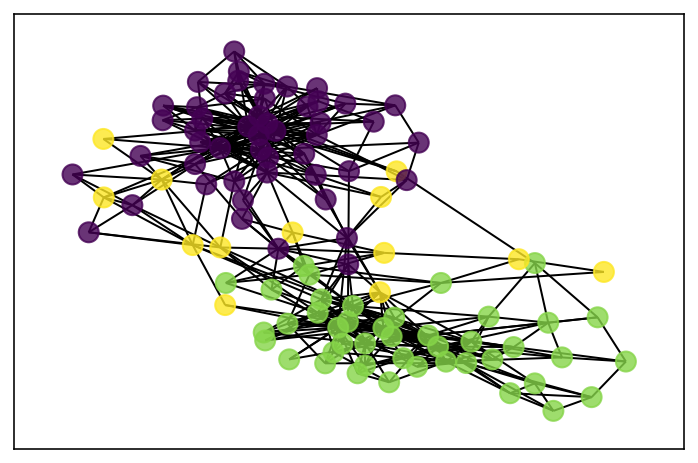

In [26]:
politics = dict(g.nodes(data = "value", default = 1)).values()
values = []
for val in politics:
    values.append(ord(val) - 96)
    
nx.draw_networkx_nodes(g, 
                       pos, 
                       node_color = list(values),
                       node_size = 100,
                       alpha = 0.8
                      )
nx.draw_networkx_edges(g, pos, width=1.0)

*Green is liberal, purple is conservative, yellow is neutral*

**Then, calculate the assortativity of the nodes based on their liberal/conservative/neutral political leanings. You can do this using the command nx.attribute_assortativity_coefficient(g, 'value'). How assortative are the books in the network based on their liberal, conservative, or neutral labels? What does this say about the book-purchasing habits of Amazon customers?**

In [27]:
nx.attribute_assortativity_coefficient(g, 'value')

0.7233077584970603

The assortativity coefficient quantifies the extent to which connected nodes share similar properties. The large positive values suggests that nodes in the network are assortative with respective to their political leanings. In other words, books in this network that were bought together tend to represent the same political leanings.

### Problem 3D) Community structure. 
Finally, let’s examine the community structure of this network. We’ll use a modularity maximizing approach to find clusters of well-connected nodes, using the greedy_modularity_communities() function in NetworkX. This function is within the algorithms.community module of NetworkX, so we’ll call it like this: nx.algorithms.community.greedy_modularity_communities(g).

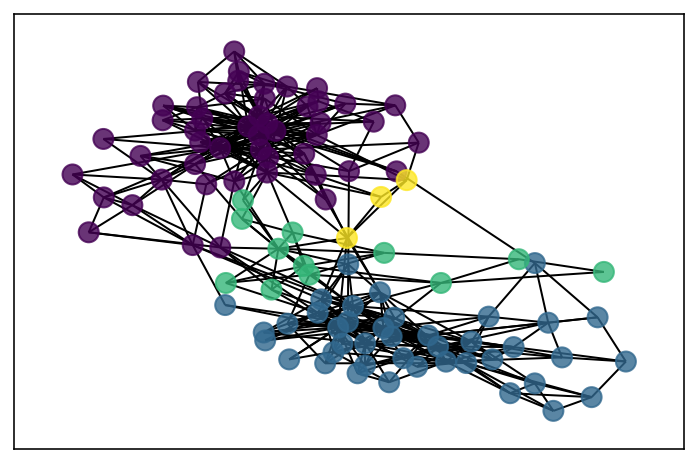

In [28]:
mods = nx.algorithms.community.greedy_modularity_communities(g)
mods #list  
mod_color = []

titles = list(dict(g.nodes(data = "value", default = 1)).keys())

for title in titles:
    # now search it all 
    for i in range(len(mods)):
        for val in mods[i]:
            if (title == val):
                mod_color.append(i)
                
                
nx.draw_networkx_nodes(g, 
                       pos, 
                       node_color = mod_color,
                       node_size = 100,
                       alpha = 0.8
                      )
nx.draw_networkx_edges(g, pos, width=1.0)

**Find the communities within the network using the above approach, and then plot the network with each community colored a different color. How well do your communities align with the liberal/conservative/neutral labels on the nodes?**


The above communities align exceedingly well with the liberal/conservative/neutral labels on the nodes, suggesting that the communities of books in the netwrok are largely determined by the book's political affiliation.

# Problem 4: Developing your Final Project
Finally, this last problem is intended to help you start putting together ideas for the model you will be building for your course project.

### Problem 4A) Topic details. 
**Pick one or two topics that you are considering working on (they don’t have to be the same ones you listed before). Address the following in a couple of sentences (no more than 1 paragraph needed here):

- Give a quick overview of the phenomena or system you are interested in modeling
- What question or goal would you like to answer/address with your model?
- How do you think ABMs and complex systems will help to answer this question?**

*I am interested in modeling pollinator networks. I actually talked with an ecologist I am planning to work with this summer about potential projects related to pollinators and network analyses. He suggested examining the "ecological feasibility' of pollinator networks by looking at the structure of pollinator networks through time and their ability to maintain positive abundances despite perturbations. Network analysis methods (those discussed in class and others to assess vulnerability to perturbation) will be useful for answering this question.

*My other project might examine ant colony competition. I am very interested in the selection and competition of ants at both individual and colony levels. An agent based model where the ants are the individual agents, but competition occurs between adjacent colonies of individually modelled ants could present opportunities to understand how different traits might be favored in selection. This would be a problem for agent based modeling.*

### Problem 4B) Literature review. 
**Start exploring the literature for papers relevant to your topic. Are there other modeling papers that have addressed this topic? Are there papers with relevant data or reviews that you can use in building your model? Find two papers that might be useful and include the citations in your write-up.**

- *Cenci, S, Song, C, Saavedra, S. Rethinking the importance of the structure of ecological networks under an environment-dependent framework. Ecol Evol., 8 (2018); pp. 6852– 6859. https://doi.org/10.1002/ece3.4252*

- *Thébault, E., & Fontaine, C. (2010). Stability of ecological communities and the architecture of mutualistic and trophic networks. Science, 329, 853–856. https://doi.org/10.1126/science.1188321*


### Problem 4C) Potential approach.
**Lastly, sketch out some ideas on how you might translate your topic of interest into an ABM. This does not need to be final or fully thought out! Just a few sentances will be great, the main purpose of this is to get you started on thinking about how to build your model. Consider the following questions in your discussion:**

*answering based on the pollinator idea*

- What will the agents in the model represent? *The agenst of the model (nodes) will be individual plants and individual insect pollinators
- What interactions will you need to consider? (Potentially think also about how you might implement these, e.g. will agents interact with grid neighbors, at random, on a network?) *Agents will interact in a network. This network will be highly assortative. In other words, plants will only interact with insect and insects will only interact with plants.*
- What type of environment might you use? *I will probably use networkX in python*
- Are there existing models or frameworks you can adapt to build your model? (Not that there need to be, but it can make things easier) *The models in the papers listed above would be great places for me to start! The code is also available, so it will be easy for me to thoroughly understand their model and be able to recreate, modify, and improve it for networkX in my analysis.*
- What outcomes of your model will you be most interested in tracking (i.e. how will you use this model to answer the question or goal from Problem 4A)? *I will be most interested in tracking its robusticity or ability to resist perturbations. I need to do some more reading to determine how this might be best measured. That function will be the metric by which I evaluate the model. I will also be interested in measurements of network topology: modularity, assortativity, critical nodes, etc. (many of the things we discussed in this lab.)*